# Uvod u znanost o podacima - projekt

### Early Predictor for Student Success Based on Behavioural and Demographical Indicators

Literatura (članak): https://durham-repository.worktribe.com/OutputFile/1140733

Doria Herceg, 0036534753
 

### UVOD
Tema istraživanja je osmisliti model koji predviđa hoće li se neki student prijevremeno ispisati s fakulteta koji nastavu održava na daljinu, na temelju informacija o studentu. Podaci su prikupljani na najvećem sveučilištu koje prakticira nastavu na daljinu u Ujedinjenom Kraljevstvu s preko 250 000 upisanih studenata.

### Priprema i vizualizacija podataka
Napomena: podatke je potrebno preuzeti s poveznice https://analyse.kmi.open.ac.uk/open_dataset i sve ih zajedno spremiti u folder "raw data" kako bi se mogli ispravno učitati u bilježnicu

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
#učitavanje setova podataka

assessments = pd.read_csv("raw data/assessments.csv", sep=",")
courses = pd.read_csv("raw data/courses.csv", sep = ",")
student_assessment = pd.read_csv("raw data/studentAssessment.csv", sep = ",")
student_info = pd.read_csv("raw data/studentInfo.csv", sep = ",")
student_registration = pd.read_csv("raw data/studentRegistration.csv", sep = ",")
student_vle = pd.read_csv("raw data/studentVle.csv", sep = ",")
vle = pd.read_csv("raw data/vle.csv", sep = ",")

### Tablica 'courses'
U ovoj tablici opisani su dostupni predmeti na fakultetu.

Značajke koje opisuju predmete su: <br>
 a) 'code_module' - šifra predmeta <br>
 b) 'code_presentation' - šifra koja označava razdoblje izvođenja predmeta, na početku je godina izvođenja, a na kraju je oznaka B za ljetni semestar i J za zimski <br>
 c) 'module_presentation_length' - duljina izvođenja predmeta u danima <br>

In [8]:
print(courses.shape)
courses.head()

(22, 3)


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


Tablica 'courses' ima 22 predmeta i svaki je opisan s 3 značajke navedene iznad.

In [9]:
# pregled koliko ima različitih vrijednosti svake značajke
courses.nunique()

code_module                   7
code_presentation             4
module_presentation_length    7
dtype: int64

In [10]:
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


Kako tablica nije prevelika možemo ju pregledati cijelu i vidjeti da nema nedostajućih vrijednosti.

In [11]:
courses.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


'Module_presentation_length' je jedina značajka u ovoj tablici koja ima numeričke vrijednosti. Iz gornje deskriptivne statistike vidljivo je da predavanja traju prosječno 255 dana s odstupanjima od +/- 2 tjedna.

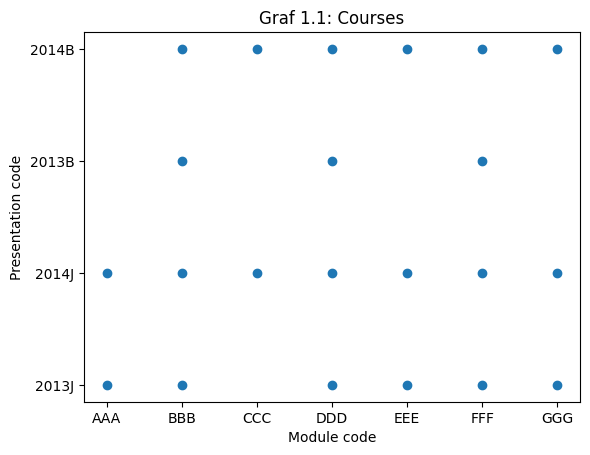

In [12]:
plt.scatter(courses.code_module, courses.code_presentation)
plt.title("Graf 1.1: Courses")
plt.xlabel("Module code")
plt.ylabel("Presentation code")
plt.show()

Iz gornjeg grafa 1.1 možemo vidjeti koji se predmeti održavaju koje godine i u kojem semestru. Naprimjer, predmeti 'BBB', 'DDD' i 'FFF' se održavaju obje godine i u ljetnom i u zimskom, dok se 'AAA' održavao samo u zimskom. Za predmete 'CCC', 'EEE' i 'GGG' možemo pretpostaviti da nedostaje informacija o održavanju predmeta u nekim semestrima pa po potrebi možemo npr. za ljetni semestar 2013 pretpostaviti da se održavao isto kao i ljetni semestar 2014.

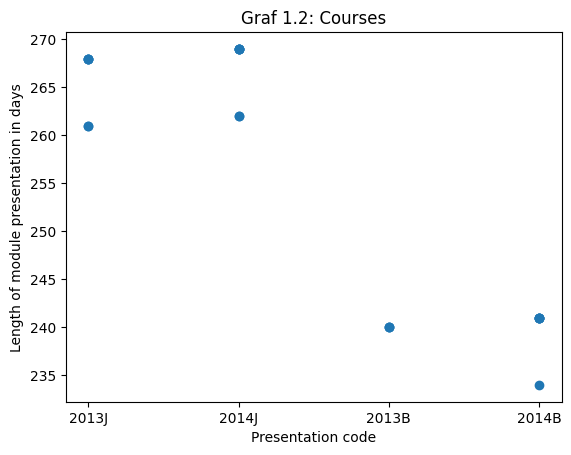

In [13]:
plt.scatter(courses.code_presentation, courses.module_presentation_length)
plt.title("Graf 1.2: Courses")
plt.xlabel("Presentation code")
plt.ylabel("Length of module presentation in days")
plt.show()

Iz grafa 1.2 možemo vidjeti da predmeti ljetnog semestra traju 20ak dana kraće od predmeta zimskog semestra. Također, možemo vidjeti i da gore izračunata srednja vrijednost nije prava vrijednost, već imamo dvije skupine predmeta koje imaju veću razliku u trajanju.

#### 2. Tablica 'Assessments'
Ovo je tablica koja opisuje zaduženja koja studenti imaju na svakom predmetu.

Ta zaduženja opisuju sljedeće značajke:

a) **'code_module'** -> šifra predmeta <br>
b) **'code_presentation'** -> šifra koja označava razdoblje izvođenja predmeta, na početku je godina izvođenja, a na kraju je oznaka B za ljetni semestar i J za zimski <br>
c) **'id_assessment'** -> identifikator zaduženja <br>
d) **'assessment_type'** -> tip zaduženja, moguće vrijednosti su TMA (Tutor Marked Assessment), CMA (Computer Marked Assessment) and Exam (Final exam) <br>
e) **'date'** -> broj dana od početka održavanja predmeta do roka za predaju zaduženja <br>
f) **'weight'** -> postotak koliko bodova nosi određen zadatak u odnosu na ukupan broj bodova na predmetu, izraženo u postotcima <br>

In [14]:
print(assessments.shape)
assessments.head()

(206, 6)


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


Tablica assessments ima 206 primjeraka zaduženja i 6 značajki koje opisuju ta zaduženja. Potrebno je provjeriti postoje li monotone značajke. Tu je već moguće posumnjati na značajku 'id_assessment' jer su identifikatori čest primjer monotonih značajki kako je njihova jedina svrha prebrojavanje primjera i povezivanje tablica pa nam u analizi nije potreban.

In [15]:
assessments.nunique()

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
date                  74
weight                24
dtype: int64

Vidi se da je jednak broj različitih vrijednosti značajke 'id_assessments' kao i broj primjera pa je tu značajku moguće izbaciti.

In [16]:
assessments.drop(('id_assessment'), axis=1, inplace=True)

In [17]:
assessments.head()

,code_module,code_presentation,assessment_type,date,weight
0,AAA,2013J,TMA,19.0,10.0
1,AAA,2013J,TMA,54.0,20.0
2,AAA,2013J,TMA,117.0,20.0
3,AAA,2013J,TMA,166.0,20.0
4,AAA,2013J,TMA,215.0,30.0


Već je u gornjem ispisu vidljivo da nedostaju neke vrijednosti iz kolone 'date'. Treba provjeriti ima li još kolona s nedostajućim vrijednostima.

In [18]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   assessment_type    206 non-null    object 
 3   date               195 non-null    float64
 4   weight             206 non-null    float64
dtypes: float64(2), object(3)
memory usage: 8.2+ KB


In [19]:
assessments.isna().sum()

code_module           0
code_presentation     0
assessment_type       0
date                 11
weight                0
dtype: int64

Postoji 11 primjera koji nemaju datum provjere. To je 8% od ukupnog primjerka pa je prije odluke što učiniti bitno još detaljnije pogledati podatke.

In [20]:
df_assessments = pd.DataFrame(assessments)
assessments_without_date = assessments[assessments['date'].isna()]
assessments_without_date

,code_module,code_presentation,assessment_type,date,weight
5,AAA,2013J,Exam,NaN,100.0
11,AAA,2014J,Exam,NaN,100.0
23,BBB,2013B,Exam,NaN,100.0
35,BBB,2013J,Exam,NaN,100.0
47,BBB,2014B,Exam,NaN,100.0
53,BBB,2014J,Exam,NaN,100.0
62,CCC,2014B,Exam,NaN,100.0
63,CCC,2014B,Exam,NaN,100.0
72,CCC,2014J,Exam,NaN,100.0
73,CCC,2014J,Exam,NaN,100.0


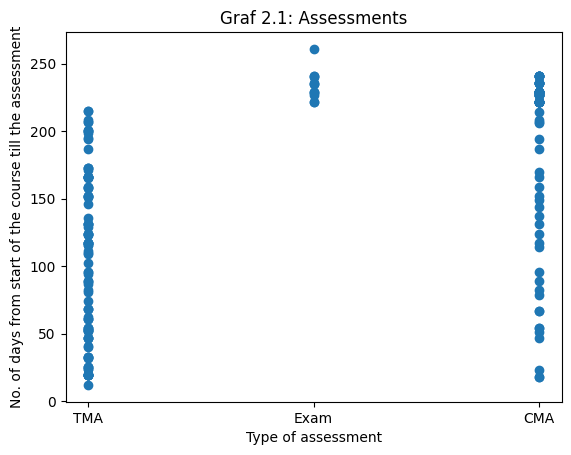

In [21]:
plt.scatter(assessments.assessment_type, assessments.date)
plt.title("Graf 2.1: Assessments")
plt.xlabel("Type of assessment")
plt.ylabel("No. of days from start of the course till the assessment")
plt.show()

Iz tablice dobivene filtriranjem tablice 'Assessments' tako da su vidljivi samo primjeri kojima nedostaje zapis datuma, vidljivo je da se radi samo o primjerima tipa 'Exam'. Također, na grafu koji prikazuje raspored težine zaduženja na predmetu prema tipu zaduženja vidimo da su sva zaduženja tipa 'Exam' u dosta bliskom periodu pa je moguće zaključiti da je u redu da se nedostajuće datume popuni sa srednjom vrijednošću svih datuma zaduženja tipa 'Exam'.

In [22]:
#deskriptivna statistika
assessments.describe()

,date,weight
count,195.000000,206.000000
mean,145.005128,20.873786
std,76.001119,30.384224
min,12.000000,0.000000
25%,71.000000,0.000000
50%,152.000000,12.500000
75%,222.000000,24.250000
max,261.000000,100.000000


Treba provjeriti postoje li stršeće vrijednosti.

In [23]:
print('Date in <0, 50]: ', ((assessments.date > 0) & (assessments.date <= 50) ).sum())
print('Date in <50, 100]: ', ((assessments.date > 50) & (assessments.date <= 100)).sum())
print('Date in <100, 150]: ', ((assessments.date > 100) & (assessments.date <= 150)).sum())
print('Date in <150, 200]: ', ((assessments.date > 150 )& (assessments.date <= 200)).sum())
print('Date in <200, 261]: ', ((assessments.date > 200) & (assessments.date <= 261)).sum())


Date in <0, 50]:  29
Date in <50, 100]:  34
Date in <100, 150]:  30
Date in <150, 200]:  33
Date in <200, 261]:  69


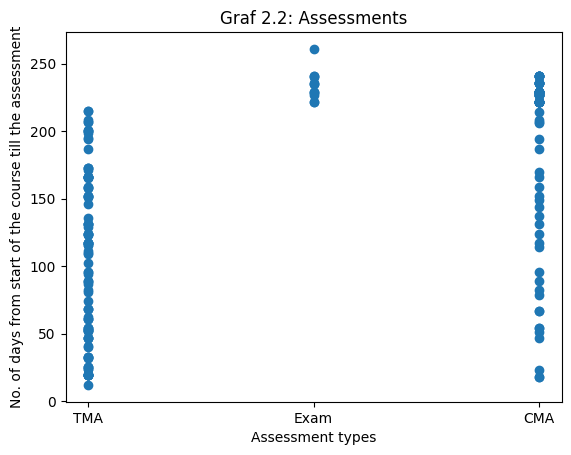

In [24]:
plt.scatter(assessments.assessment_type, assessments.date)
plt.title("Graf 2.2: Assessments")
plt.xlabel("Assessment types")
plt.ylabel("No. of days from start of the course till the assessment")
plt.show()

Iz gornjeg ispisa i grafa vidljivo je da u koloni 'date' nema stršećih vrijednosti.

In [25]:
print('Weight in <0, 20]: ', ((assessments.weight > 0) & (assessments.weight <= 20) ).sum())
print('Weight in <20, 40]: ', ((assessments.weight > 20) & (assessments.weight <= 40)).sum())
print('Weight in <40, 60]: ', ((assessments.weight > 40) & (assessments.weight <= 60)).sum())
print('Weight in <60, 80]: ', ((assessments.weight > 60 )& (assessments.weight <= 80)).sum())
print('Weight in <80, 100]: ', ((assessments.weight > 80) & (assessments.weight <= 100)).sum())

Weight in <0, 20]:  92
Weight in <20, 40]:  34
Weight in <40, 60]:  0
Weight in <60, 80]:  0
Weight in <80, 100]:  24


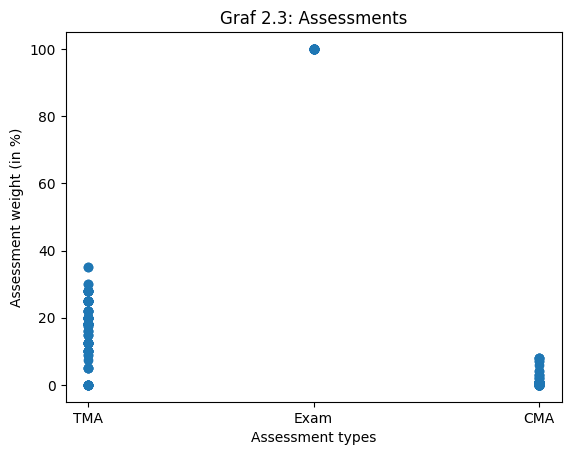

In [26]:
plt.scatter(assessments.assessment_type, assessments.weight)
plt.title("Graf 2.3: Assessments")
plt.xlabel("Assessment types")
plt.ylabel("Assessment weight (in %)")
plt.show()

Iz gornjeg ispisa i grafa vidljivo je da u koloni 'date' nema značajno stršećih vrijednosti.

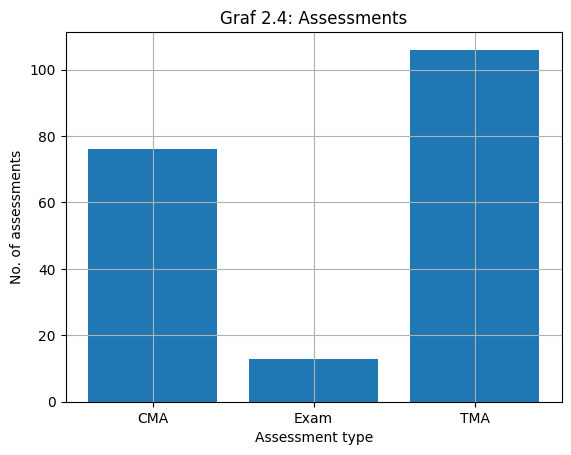

In [27]:
count_per_type = assessments.groupby('assessment_type').count().loc[:,'date'].values
assessment_types = assessments.groupby('assessment_type').count().index.values

plt.grid()
plt.bar(assessment_types, count_per_type)
plt.title("Graf 2.4: Assessments")
plt.xlabel("Assessment type")
plt.ylabel("No. of assessments")
plt.show()

Graf 2.4 pokazuje koliko ima zaduženja iz svake kategorije.

#### 3. Tablica 'Vle'
Ova tablica je popis svih dostupnih materijala za svaki predmet na VLE platformi (Virtual Learning Environment).<br>

Materijale opisuju sljedeće značajke: <br>

a) *id_site* -> identifikator materijala <br>
b) *'code_module'* - šifra predmeta <br>
c) *'code_presentation'* - šifra koja označava razdoblje izvođenja predmeta, na početku je godina izvođenja, a na kraju je oznaka B za ljetni semestar i J za zimski <br>
d) *'activity_type'* - vrsta materijala
e) *'week_from'* - broj tjedna u kojem bi studenti trebali početi korisititi materijal
f) *'week_to'* - broj tjedna u kojem bi studenti trebali završiti s korištenjem materijal

In [28]:
print(vle.shape)
vle.head()

(6364, 6)


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [29]:
vle.nunique()

id_site              6364
code_module             7
code_presentation       4
activity_type          20
week_from              30
week_to                30
dtype: int64

Opet je opravdano obrisati identifikator tablice, odnosno u ovom slučaju kolonu 'id_site' (monotona varijabla), međutim dobro ju je i ostaviti u datasetu jer je potrebna kod operacija prebrojavanja.

In [30]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


Od početka je vidljivo da nedostaje puno podataka za značajke 'week_from' i 'week_to'. Međutim, ima previše poznatih vrijednosti da bismo mogli izbaciti te značajke te previše nepoznatih vrijednosti da bismo mogli izbaciti primjere.

In [31]:
vle.describe()

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


In [32]:
#filter vle.week_from so that there is no nan values
vle_without_empty_week_values = vle[~vle['week_from'].isna()]
vle_without_empty_week_values = vle_without_empty_week_values[~vle_without_empty_week_values['week_to'].isna()]

vle_only_empty_week_values = vle[vle['week_from'].isna()]
vle_only_empty_week_values = vle_only_empty_week_values[vle_only_empty_week_values['week_to'].isna()]


In [33]:
vle_only_empty_week_values

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [34]:
#count how many of each code_module there is
count_per_module_without_empty_week_values = vle_without_empty_week_values.groupby('code_module').count().loc[:,'id_site'].values
count_per_module_without_empty_week_values

array([  6, 186,  10,   2,  79, 826,  12])

In [35]:
#count how many of each code_module there is in the dataset without id_site
count_per_module2 = vle.groupby('code_module').count().loc[:,'id_site'].values
count_per_module2

array([ 413, 1154,  419, 1708,  336, 1967,  367])

In [36]:
for i in range (0, len(count_per_module_without_empty_week_values)):
    print(vle.code_module.unique()[i] +  "->" + (count_per_module_without_empty_week_values[i]/count_per_module2[i]).astype(str))

AAA->0.014527845036319613
BBB->0.1611785095320624
CCC->0.02386634844868735
DDD->0.00117096018735363
EEE->0.23511904761904762
FFF->0.4199288256227758
GGG->0.0326975476839237


U gornjem ispisu možemo vidjeti koliki bi se postotak zapisa o kojem predmetu izgubio kada bismo obrisali značajke 'week_from' and 'week-to'. <br>
Ne možemo izbrisati značajke, a ne možemo ni obrisati zapise bez podataka o tim značajkama. Jedino što preostaje je popuniti te informacije, a to bi se moglo tako da, ako primjerice nedostaju podaci za predmet 'AAA' u ljetnom semestru 2013., mogli bismo ih uzeti iz 'AAA' u ljetnom semestru 2014.
Ne smatram da bi to u ukupnom  pogledu na podatke značajno pridonijelo pa sam odlučila podatke samo ostaviti kakvi jesu.

#### 4. Tablica studentInfo.csv
Ova tablica sadrži demografske podatke o studentima te njihovim rezultatima na studiju. <br>

Značajke ove tablice su: <br>

a) *code_module* - šifra predmeta kojeg student polaže <br>
b) *code_presentation* - šifra koja označava razdoblje u kojem student pohađa predmet, na početku je godina izvođenja, a na kraju je oznaka B za ljetni semestar i J za zimski <br>
c) *id_student* - identifikator studenta <br>
d) *gender* – spol studenta<br>
e) *region* – mjesto stanovanja studenta za vrijeme polaganja predmeta<br>
f) *highest_education* – najviše položen stupanj obrazovanja u trenutku upisivanja predmeta<br>
g) *imd_band* – indeks stupnja siromaštva mjesta stanovanja studenta u trenutku polaganja predmeta<br>
h) *age_band* – dobna skupina kojoj student pripada<br>
i) *num_of_prev_attempts* – broj pokušaja polaganja predmeta<br>
j) *studied_credits* – broj bodova (npr. ECTS-a) koje je student položio<br>
k) *disability* – označava ima li student neku teškoću u razvoju<br>
l) *final_result* – status studenta na kraju semestra (prolaz/pad/ispisao predmet/prolaz s pohvalom)<br>

In [37]:
print(student_info.shape)
student_info.head()

(32593, 12)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [38]:
student_info.nunique()

code_module                 7
code_presentation           4
id_student              28785
gender                      2
region                     13
highest_education           5
imd_band                   10
age_band                    3
num_of_prev_attempts        7
studied_credits            61
disability                  2
final_result                4
dtype: int64

U nekim slučajevima valja obrisati kolonu s primarnim identifikatorom, međutim ovdje značajku 'student_id' ne treba brisati jer to nije jedinstveni identifikator zbog toga što je moguće da je isti student upisao više predmeta pa je isti identifikator zapisan više puta.

In [39]:
student_info.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

Jedina značajka kojoj nedostaju podatci je značajka 'IMD_Band'. U slučaju da se ti podaci pokažu potrebnima u analizi, vjerojatno bi se vrijednosti mogle pronaći iz podataka u regiji u kojoj je student živio i godine u kojoj je polagao predmet. Za sad ćemo tu kolonu zanemariti.

Percentage of male students: 54.84%
Percentage of female students: 45.16%


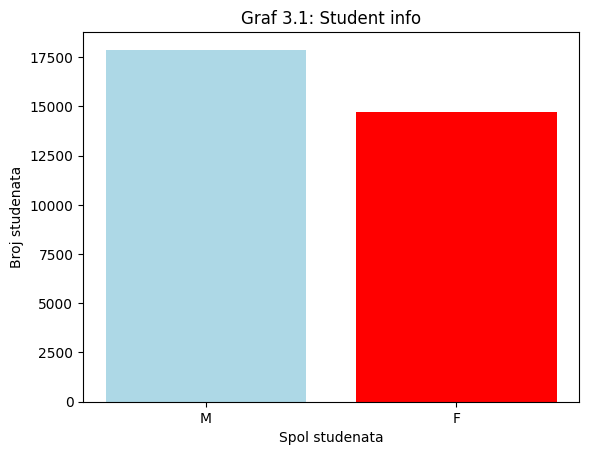

In [40]:
male = (student_info.gender == 'M').sum()
female = (student_info.gender == 'F').sum()

count_genders = {}
for gender in (student_info.gender.unique()):
    count_genders.update({gender: (student_info.gender == gender).sum()})

print("Percentage of male students: {:.2f}%".format((male/(male + female)*100)))
print("Percentage of female students: {:.2f}%".format((female/(male + female)*100)))


#bar chart representing number of students per gender
plt.bar(count_genders.keys(), count_genders.values(), color = ['lightblue', 'red'])
plt.xlabel("Spol studenata")
plt.ylabel("Broj studenata")
plt.title("Graf 3.1: Student info")
plt.show()

Vidljivo je da je predmete polaže malo više muškaraca nego žena.

In [41]:
student_info.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


Ovaj ispis deskriptivne statistike opisuje 3 numeričke varijable. Identifikator nema razloga proučavati jer ne pokazuje nikakvu veličinu, dok za druge dvije značajke valja provjeriti postoji li stršećih vrijednosti. Najbolje vizualizacijom. 

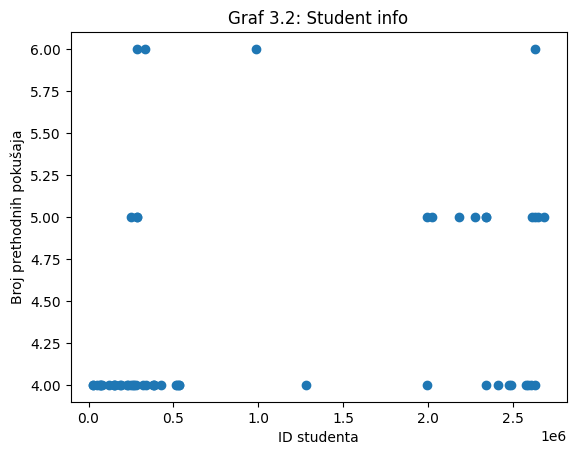

In [42]:
#show number of previous attempts for each student that has more than 3 previous attempts
plt.scatter(student_info[student_info.num_of_prev_attempts > 3].id_student, student_info[student_info.num_of_prev_attempts > 3].num_of_prev_attempts)
plt.xlabel("ID studenta")
plt.ylabel("Broj prethodnih pokušaja")
plt.title("Graf 3.2: Student info")
plt.show()

U gornjem grafu (Graf 3.2) vidljivo je da su samo 4 studenta predmet upisivala 6 puta. To bi mogla biti greška odnosno stršeći podatak, a mogla bi biti i posljedica prirodnog događaja pa samo činjenica da ti podaci odskaču od ostalih nije dovoljno jak argument za izbacivanje tih podataka.

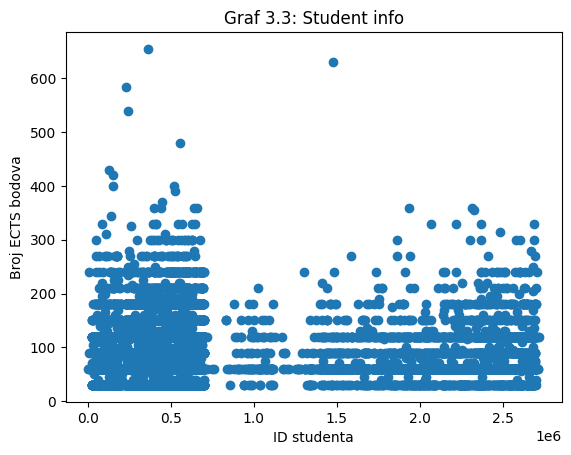

In [43]:
plt.scatter(student_info.id_student, student_info.studied_credits)
plt.xlabel("ID studenta")
plt.ylabel("Broj ECTS bodova")
plt.title("Graf 3.3: Student info")
plt.show()

Sudeći prema grafu 3.3, opravdano je izbaciti sve zapise koji imaju vrijednost dosad položenih ECTS bodova više od 450.
Također, treba zapamtiti sve vrijednosti značajke 'student_id' za zapise koje izbacujemo kako bismo ih mogli izbaciti i iz drugih tablica u kojima se spominju.

In [44]:
#delete records with studied credits > 450 and print their student id
students_to_delete = student_info[student_info.studied_credits > 450]

In [45]:
student_info = student_info[~student_info.id_student.isin(students_to_delete.id_student)]
student_info.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.258800e+04,32588.000000,32588.000000
mean,7.067080e+05,0.163128,79.682245
std,5.491767e+05,0.479641,40.601220
min,3.733000e+03,0.000000,30.000000
25%,5.085992e+05,0.000000,60.000000
50%,5.903265e+05,0.000000,60.000000
75%,6.444540e+05,0.000000,120.000000
max,2.716795e+06,6.000000,430.000000


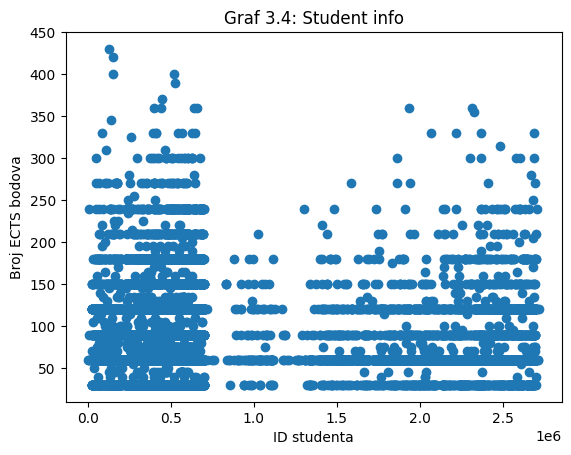

In [46]:
plt.scatter(student_info.id_student, student_info.studied_credits)
plt.xlabel("ID studenta")
plt.ylabel("Broj ECTS bodova")
plt.title("Graf 3.4: Student info")
plt.show()

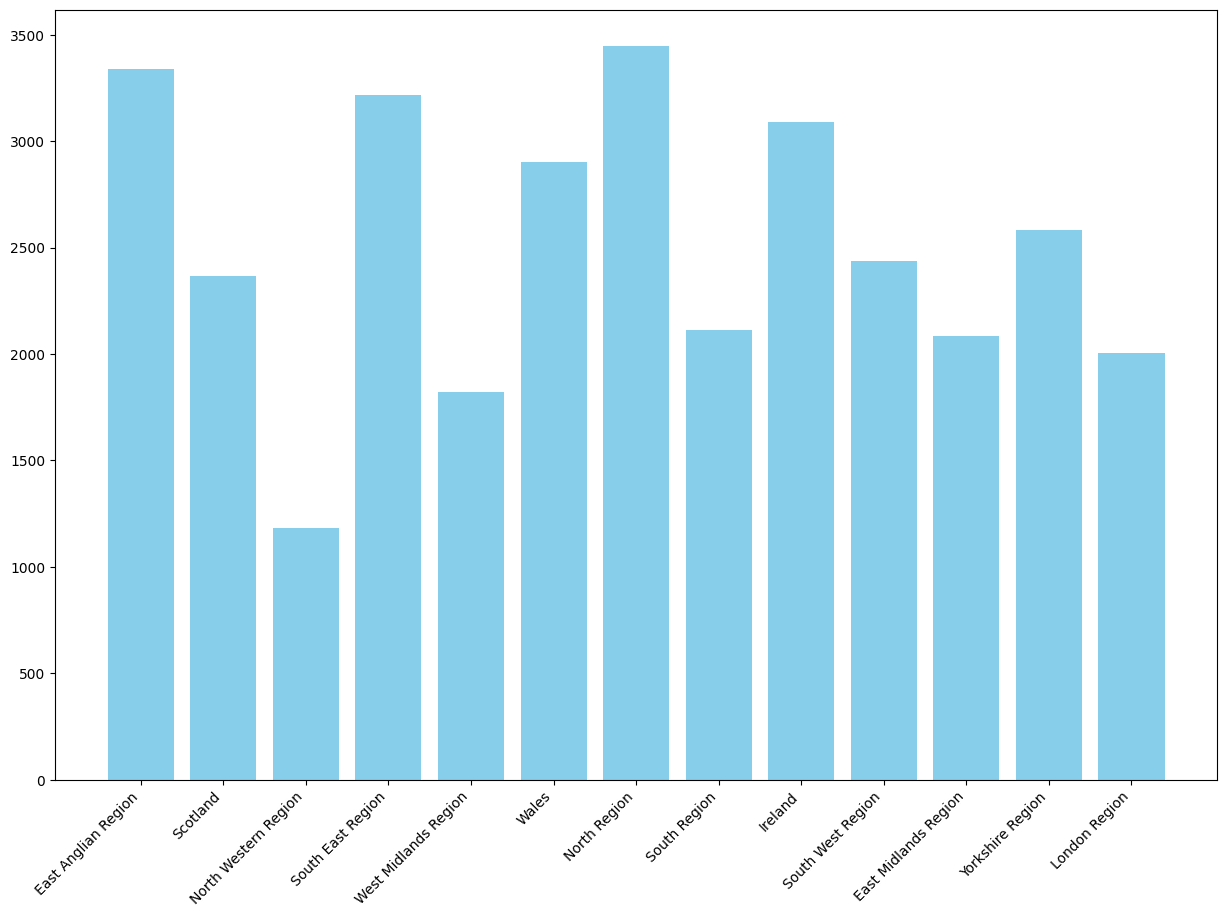

In [47]:
#count how many students are in each region
count_per_region = student_info.groupby('region').count().loc[:,'id_student'].values
count_per_region
#bar chart with numbers of students per region
figure = plt.figure(figsize=(15, 10))
plt.bar(student_info.region.unique(), count_per_region, color = "skyblue")
plt.xticks(rotation=45, ha='right')
plt.show()

Još jedan zanimljiv prikaz je graf podjele studenata po regijama. Vidljivo je da su manje-više sve jednako zastupljene.

# 2. REPLIKACIJA REZULTATA

Problem je klasifikaciji - pokušava unaprijed identificirati studente koji bi mogli pasti studij ili odustati od njega. Cilj je te studente unaprijed upozoriti. U pitanju je multivarijantna klasifikacija jer su oznake iz skupa {Odustao/la, Pad, Prolaz, Izvrsni prolaz}.

In [48]:
student_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32588 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32588 non-null  object
 1   code_presentation     32588 non-null  object
 2   id_student            32588 non-null  int64 
 3   gender                32588 non-null  object
 4   region                32588 non-null  object
 5   highest_education     32588 non-null  object
 6   imd_band              31478 non-null  object
 7   age_band              32588 non-null  object
 8   num_of_prev_attempts  32588 non-null  int64 
 9   studied_credits       32588 non-null  int64 
 10  disability            32588 non-null  object
 11  final_result          32588 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.2+ MB


In [49]:
student_info.nunique()

code_module                 7
code_presentation           4
id_student              28780
gender                      2
region                     13
highest_education           5
imd_band                   10
age_band                    3
num_of_prev_attempts        7
studied_credits            56
disability                  2
final_result                4
dtype: int64

U istraživanju je sudjelovalo 32593 studenata, od njih 55% muškaraca i 45% žena. Pohađali su 7 različitih predmeta preko platforme Virtual Learning Environment (VLE).

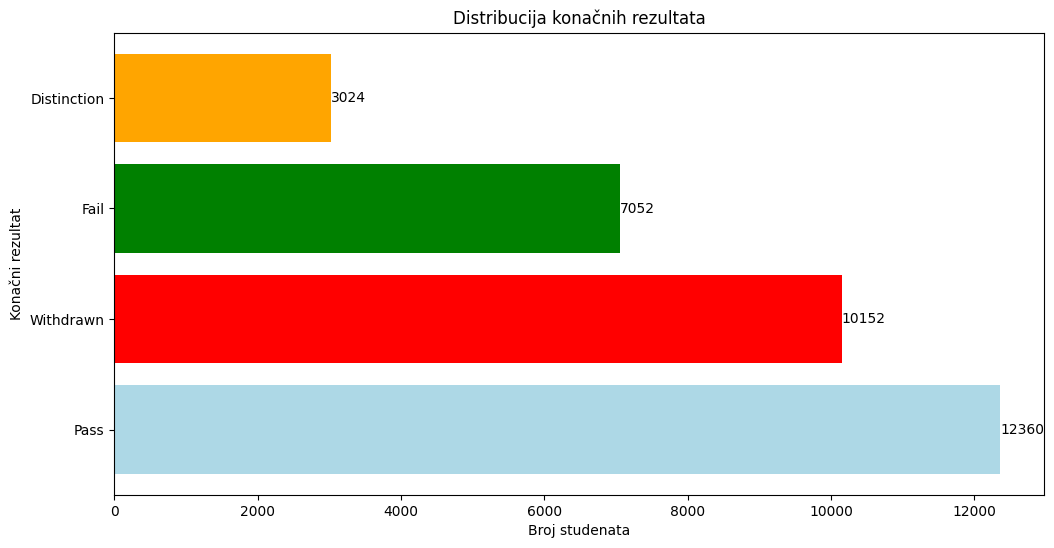

In [50]:
plt.figure(figsize=(12, 6))
bars = plt.barh(student_info.final_result.unique(), student_info['final_result'].value_counts().values, color = ['lightblue', 'red', 'green', 'orange'])
plt.xlabel("Broj studenata")
plt.ylabel("Konačni rezultat")
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f'{xval}', ha='left', va='center')

plt.title("Distribucija konačnih rezultata")
plt.show()

In [51]:
student_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [52]:
no_of_registered_students = student_info.groupby('code_module')['id_student'].count()


In [53]:
print(no_of_registered_students)

code_module
AAA     748
BBB    7907
CCC    4432
DDD    6271
EEE    2934
FFF    7762
GGG    2534
Name: id_student, dtype: int64


In [54]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [55]:
assessments.head()

,code_module,code_presentation,assessment_type,date,weight
0,AAA,2013J,TMA,19.0,10.0
1,AAA,2013J,TMA,54.0,20.0
2,AAA,2013J,TMA,117.0,20.0
3,AAA,2013J,TMA,166.0,20.0
4,AAA,2013J,TMA,215.0,30.0


In [56]:
earliest_assessment_dates = assessments.groupby('code_module')['date'].min()
print(earliest_assessment_dates)


code_module
AAA    19.0
BBB    12.0
CCC    18.0
DDD    20.0
EEE    33.0
FFF    19.0
GGG    61.0
Name: date, dtype: float64


In [57]:
code_module_runs = courses.groupby('code_module')['code_presentation'].unique()

In [58]:
print(code_module_runs)

code_module
AAA                  [2013J, 2014J]
BBB    [2013J, 2014J, 2013B, 2014B]
CCC                  [2014J, 2014B]
DDD    [2013J, 2014J, 2013B, 2014B]
EEE           [2013J, 2014J, 2014B]
FFF    [2013J, 2014J, 2013B, 2014B]
GGG           [2013J, 2014J, 2014B]
Name: code_presentation, dtype: object


In [59]:
for i in range(7):
    code_module_runs[i] = "2013 & 2014"
code_module_runs[2] = "2014"

In [60]:
mooc_info = pd.merge(pd.merge(earliest_assessment_dates, no_of_registered_students, on='code_module'), code_module_runs, on='code_module')
mooc_info = mooc_info.rename(columns={'code_module': 'course'})

for i in range(7):
    mooc_info.date[i] = "Day " + str(round(mooc_info.date[i]))


In [61]:
print(mooc_info)

               date  id_student code_presentation
code_module                                      
AAA          Day 19         748       2013 & 2014
BBB          Day 12        7907       2013 & 2014
CCC          Day 18        4432              2014
DDD          Day 20        6271       2013 & 2014
EEE          Day 33        2934       2013 & 2014
FFF          Day 19        7762       2013 & 2014
GGG          Day 61        2534       2013 & 2014


In [62]:
student_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


• **First Assignment Mark:** Ocjena studenta na prvom zadatku iz predmeta, značajka "score" u datoteci StudentsAssessments.csv.

• **Educational Level:** Najviša razina obrazovanja studenta prije upisivanja ovog studija. To je značajka "highest_education" u datoteci "StudentInfo.csv", 4 vrijednosti te značajke su: "Lower than A level", "A level or equivalent", "HE Qualification" i "Post Graduate Qualification".

• **Clicks till Course Starts:** Broj klikova koje je student napravio prije početka predmeta. To je značajka "sum_click" u datoteci "StudentVle.csv".

• **Registration Date:** Broj dana od početka predavanja do registracije studenta. To je značajka "date_registration" u datoteci "StudentRegistration.csv".

• **Age:** Raspon godina u kojemu se student nalazi. To je značajka "age_band" i moguće vrijednosti te značajke su 0-35, 35-55, >55. Ta značajka se nalazi u datoteci "StudentInfo.csv".

• **Disability:** Informacija o tome ima li student neku poteškoću. Navedeno u datoteci "StudentInfo.csv" pod imenom "disability".

• **Gender:** Spol studenta, zapisano u datoteci "StudentInfo.csv" pod imenom "gender".

• **Previous Attempts:** Broj puta koliko je student pao određeni predmet. Zapisano u značajki "num_of_pred_attempts" u datoteci "StudentInfo.csv".

In [64]:
import scipy.stats

Pearsonov chi-kvadrat test je statistički test koji provjerava ovisnost dviju varijabli. Nulta pretpostavka je da su varijable nezavisne, a ako je p-vrijednost dovoljno mala (manja od 0.05), onda možemo odbaciti tu pretpostavku i zaključiti da postoji veza među njima.

In [65]:
def chi2_test(table, variable_name):
    stat, p, dof, expected = scipy.stats.chi2_contingency(table)

    print(f"Chi-squared test for {variable_name}:")
    print(f"  p-value = {p}")
    print("\n")

In [66]:
contingency_table_education = pd.crosstab(student_info['highest_education'], student_info['final_result'])
contingency_table_age = pd.crosstab(student_info['age_band'], student_info['final_result'])
contingency_table_gender = pd.crosstab(student_info['gender'], student_info['final_result'])
contingency_table_disability = pd.crosstab(student_info['disability'], student_info['final_result'])


In [67]:
chi2_test(contingency_table_education, "Highest education")
chi2_test(contingency_table_age, "Age")
chi2_test(contingency_table_gender, "Gender")
chi2_test(contingency_table_disability, "Disability")

Chi-squared test for Highest education:
  p-value = 1.099815954956858e-211


Chi-squared test for Age:
  p-value = 2.738567629566083e-45


Chi-squared test for Gender:
  p-value = 0.0009327565600880404


Chi-squared test for Disability:
  p-value = 7.762170547919785e-30




Možemo vidjeti da su p-vrijednosti za sve varijable značajno manje od 0.05 pa zaključujem da o svima njima ovisi izlazna vrijednost.

Kako bismo vidjeli međusobnu ovisnost značajki, provodimo Pearsonov korelacijski test.

In [68]:
# Assuming your DataFrame is named "df"
student_info['gender'] = student_info['gender'].map({'F': 0.0, 'M': 1.0})
student_info['highest_education'] = student_info['highest_education'].map({'HE Qualification': 0.0, "Lower than A level": 1.0, "A level or equivalent": 2.0, "Post Graduate Qualification": 3.0})
student_info['age_band'] = student_info['age_band'].map({'0-35': 0.0, "35-55": 1.0, "55<=": 2.0})
student_info['disability'] = student_info['disability'].map({'N': 0, 'Y': 1.0})

In [69]:
student_assessment_avg = student_assessment.groupby('id_student')['score'].mean().reset_index()
student_vle_total = student_vle.groupby('id_student')['sum_click'].sum().reset_index()

In [70]:
merged_data = student_info.merge(student_assessment_avg, on='id_student', how='left')
merged_data = merged_data.merge(student_vle_total, on='id_student', how='left')
merged_data = merged_data.merge(student_registration[['id_student', 'date_registration']], on='id_student', how='left')
merged_data['registration_date_numeric'] = pd.to_numeric(merged_data['date_registration'], errors='coerce')


In [71]:
znacajke = merged_data[['gender', 'highest_education', 'age_band', 'num_of_prev_attempts', 'disability', 'score', 'date_registration']]
corr_matrix = znacajke.corr(method='pearson')

print(corr_matrix)

                        gender  highest_education  age_band  \
gender                1.000000           0.048549 -0.024516   
highest_education     0.048549           1.000000  0.103400   
age_band             -0.024516           0.103400  1.000000   
num_of_prev_attempts -0.029603           0.019019  0.020933   
disability           -0.044216          -0.056254 -0.021680   
score                -0.009566           0.124068  0.078601   
date_registration    -0.014244           0.048644  0.022482   

                      num_of_prev_attempts  disability     score  \
gender                           -0.029603   -0.044216 -0.009566   
highest_education                 0.019019   -0.056254  0.124068   
age_band                          0.020933   -0.021680  0.078601   
num_of_prev_attempts              1.000000    0.068074 -0.095016   
disability                        0.068074    1.000000 -0.059628   
score                            -0.095016   -0.059628  1.000000   
date_registration  

In [72]:
import numpy as np

# Extract the lower triangular part of the correlation matrix
lower_triangular = np.tril(corr_matrix)

# Print the lower triangular matrix
for i in  range (len(lower_triangular)):
    for j in range (i+1):
        print(round(lower_triangular[i][j], 2), end=" ")
    print()



1.0 
0.05 1.0 
-0.02 0.1 1.0 
-0.03 0.02 0.02 1.0 
-0.04 -0.06 -0.02 0.07 1.0 
-0.01 0.12 0.08 -0.1 -0.06 1.0 
-0.01 0.05 0.02 -0.03 -0.01 0.02 1.0 


Iz gornjeg ispisa možemo vidjeti da varijable jako jako malo međusobno koreliraju pa to znači da možemo koristiti robusnije i algoritme boljih performansi na ovim podacima.
Varijable koje ćemo koristiti u predikciji krajnjeg rezultata studenata su: *First Assignment Mark, Educational Level, Clicks till Course Starts, Registration date, Age, and Gender*.
70% podataka koristimo za treniranje, a 30% za testiranje modela.

## 1. STABLO ODLUKE

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

X = merged_data[['score', 'highest_education', 'sum_click', 'date_registration', 'age_band', 'gender']]
y = pd.get_dummies(merged_data['final_result'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

for i, class_label in enumerate(y_train.columns):
    print("Class: ", class_label)
    print("Precision:", precision_score(y_test[class_label], y_pred[:, i], average='weighted'))
    print("F1:", f1_score(y_test[class_label], y_pred[:, i], average='weighted'))
    print("Recall:", recall_score(y_test[class_label], y_pred[:, i], average='weighted'))
    print("Accuracy:", accuracy_score(y_test[class_label], y_pred[:, i]))
    print()


Class:  Distinction
Precision: 0.9096811688732905
F1: 0.9114048777275308
Recall: 0.9231146335484925
Accuracy: 0.9231146335484925

Class:  Fail
Precision: 0.7486987025891839
F1: 0.7494927590498849
Recall: 0.7888716398398562
Accuracy: 0.7888716398398562

Class:  Pass
Precision: 0.7245108474327714
F1: 0.7245802856582559
Recall: 0.724650706757088
Accuracy: 0.724650706757088

Class:  Withdrawn
Precision: 0.7508548354622582
F1: 0.7398923979281488
Recall: 0.7560258191028679
Accuracy: 0.7560258191028679



# 2. Random forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier


In [77]:
X = merged_data[['score', 'highest_education', 'sum_click', 'date_registration', 'age_band', 'gender']]
y = pd.get_dummies(merged_data['final_result'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
X_test = X_test.fillna(X_test.mean())
X_test.isna().sum()

score                0
highest_education    0
sum_click            0
date_registration    0
age_band             0
gender               0
dtype: int64

In [91]:
#Random Forest
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

for i, class_label in enumerate(y_train.columns):
    print("Class: ", class_label)
    print("Precision:", precision_score(y_test[class_label], y_pred[:, i], average='weighted', zero_division=0))
    print("F1:", f1_score(y_test[class_label], y_pred[:, i], average='weighted', zero_division=0))
    print("Recall:", recall_score(y_test[class_label], y_pred[:, i], average='weighted', zero_division=0))
    print("Accuracy:", accuracy_score(y_test[class_label], y_pred[:, i]))
    print()

Class:  Distinction
Precision: 0.9096811688732905
F1: 0.9114048777275308
Recall: 0.9231146335484925
Accuracy: 0.9231146335484925

Class:  Fail
Precision: 0.7486987025891839
F1: 0.7494927590498849
Recall: 0.7888716398398562
Accuracy: 0.7888716398398562

Class:  Pass
Precision: 0.7245108474327714
F1: 0.7245802856582559
Recall: 0.724650706757088
Accuracy: 0.724650706757088

Class:  Withdrawn
Precision: 0.7508548354622582
F1: 0.7398923979281488
Recall: 0.7560258191028679
Accuracy: 0.7560258191028679

